# Importing Tools

In [121]:
#Numpy is a library for working with arrays 
import numpy as np
#Pandas is a library for creating Dataframes
import pandas as pd
#Pyplot is a library for 'plotting' or graphing data
import matplotlib.pyplot as plt
#%matplotlib inline will allow visualizations to appear inline
%matplotlib inline

#Jupyter Notebooks will give warnings about compatability, I like to filter them out
import warnings
warnings.simplefilter('ignore')

# Importing the Data 

In [122]:
#First we will load in the data using the pandas read_csv method
#We use the optional 'index_col' to set the index column to the first column
data_set_1 = pd.read_csv('ds1.csv', index_col=0)
data_set_2 = pd.read_csv('ds2.csv', index_col=0)
data_set_3 = pd.read_csv('ds3.csv', index_col=0)
data_set_4 = pd.read_csv('ds4.csv', index_col=0)
data_set_5 = pd.read_csv('ds5.csv', index_col=0)

###  Let's take a look first dataset's top five rows using the pandas head method

In [123]:
data_set_1.head()

,x,y
1,71.701491,989.568584
2,-39.566061,-445.524235
3,-9.737956,-120.750964
4,68.658128,619.764027
5,74.999762,661.788583


### We can see a little information about our data using the info and describe methods

#### There are 1,000 data points with x values between -99.9 and 99.9, and y values  between -1,652.9 and 1,616.7

In [124]:
data_set_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 2 columns):
x    1000 non-null float64
y    1000 non-null float64
dtypes: float64(2)
memory usage: 23.4 KB


In [125]:
data_set_1.describe()

,x,y
count,1000.000000,1000.000000
mean,1.200867,6.978646
std,57.381149,575.736730
min,-99.922393,-1652.900163
25%,-46.866031,-406.053366
50%,0.316495,-2.626518
75%,51.099325,437.636838
max,99.967054,1616.701462


#### First we will grab the X and y values by 'slicing' the dataset using the column names, and put them into Dataframes

In [126]:
X = pd.DataFrame(data_set_1['x'])
y = pd.DataFrame(data_set_1['y'])

# Splitting the Dataset 

#### Splitting the data set will allow us to train the model most of our data, and then test how well trained the data is on the remainder of our data. If we trained with all of the data, we wouldn't be able to test the data because our model would have been biased.

In [127]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### We can see that X_test is now 200 values, or 20% (test_size=0.2) of the original size of X

In [128]:
X_test.describe()

,x
count,200.000000
mean,6.963897
std,57.863967
min,-99.905529
25%,-41.892403
50%,9.622194
75%,54.721082
max,98.396084


# Building the Model

## Importing the model from Sklearn

In [129]:
from sklearn.linear_model import LinearRegression

## Creating a model object

In [130]:
model = LinearRegression()

## Fitting the Model 

#### Now that we have a model object, we can fit it to our training data to create a line that best fits the data. This will allow us to use that line to predict new y values if we are given new X values

In [131]:
trained_model = model.fit(X_train, y_train)

#### Our model is trained, so now we can look at the line we created with the data we are predicting

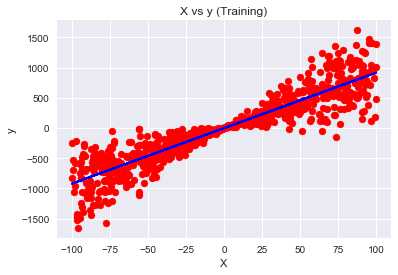

Coefficient:  [[9.1859367]] Intercept:  [-2.93803071]


In [132]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('X vs y (Training)')
plt.xlabel('X')
plt.ylabel('y')
plt.show()
print('Coefficient: ', trained_model.coef_, 'Intercept: ', trained_model.intercept_)

#### Let's predict the y values for the test data and see how close we are to the actual test y values

In [133]:
y_pred = model.predict(X_test)

#### We can see the predicted y values are just a straight line, and the actual y values are in more of a hourglass shape. This is because our model is a straight line, so all predictions will be on that line. 

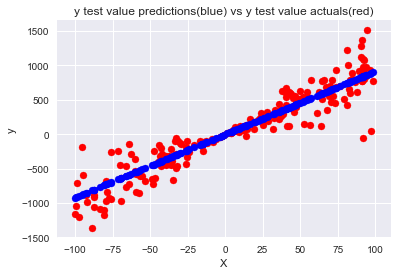

Coefficient:  [[9.1859367]] Intercept:  [-2.93803071]


In [134]:
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, model.predict(X_test), color = 'blue')
plt.title('y test value predictions(blue) vs y test value actuals(red)')
plt.xlabel('X')
plt.ylabel('y')
plt.show()
print('The slope of the line known as the Coefficient is ', trained_model.coef_, '. In other words, for a one unit increase in X, we will see a ', trained_model.coef_,' unit increase in y. The starting point for y, or the y value if X is zero is known as the Intercept, which is ', trained_model.intercept_)

# Scoring our model

In [135]:
print('The line we created was accurate {0:.1f}% of the time on the training data, and accurate {0:.1f}% of the time on the test data.'.format(trained_model.score(X_train, y_train)*100, trained_model.score(X_test, y_test)*100))

The line we created was accurate 84.3% of the time on the training data, and accurate 84.3% of the time on the test data.


## Now you can build the models for the remaining 4 Datasets!